**Motor Control**

-2.542410726391609e-16


c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


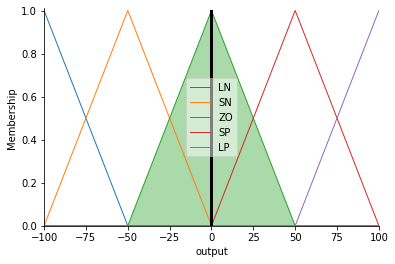

In [7]:
# fuzzy DC motor control

from decimal import ROUND_05UP
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

error   = ctrl.Antecedent(np.arange(-100, 101, 1), 'error')
dev     = ctrl.Antecedent(np.arange(-100, 101, 1), 'dev')
output  = ctrl.Consequent(np.arange(-100, 101, 1), 'output')

# Create membership function

error['LN'] = fuzz.trimf(error.universe, [-100, -100,  -50])
error['SN'] = fuzz.trimf(error.universe, [-100,  -50,    0])
error['ZO'] = fuzz.trimf(error.universe, [ -50,    0,   50])
error['SP'] = fuzz.trimf(error.universe, [   0,   50,  100])
error['LP'] = fuzz.trimf(error.universe, [  50,  100,  100])

dev['LN'] = fuzz.trimf(dev.universe, [-100, -100,  -50])
dev['SN'] = fuzz.trimf(dev.universe, [-100,  -50,    0])
dev['ZO'] = fuzz.trimf(dev.universe, [ -50,    0,   50])
dev['SP'] = fuzz.trimf(dev.universe, [   0,   50,  100])
dev['LP'] = fuzz.trimf(dev.universe, [  50,  100,  100])

output['LN'] = fuzz.trimf(output.universe, [-100, -100,  -50])
output['SN'] = fuzz.trimf(output.universe, [-100,  -50,    0])
output['ZO'] = fuzz.trimf(output.universe, [ -50,    0,   50])
output['SP'] = fuzz.trimf(output.universe, [   0,   50,  100])
output['LP'] = fuzz.trimf(output.universe, [  50,  100,  100])

# Rule creation.

r1 = ctrl.Rule((error['LN'] & dev['LN'])|
               (error['SN'] & dev['LN'])|
               (error['ZO'] & dev['LN'])|
               (error['LN'] & dev['SN'])|
               (error['LN'] & dev['ZO']), output['LP'])

r2 = ctrl.Rule((error['SN'] & dev['SN'])|
               (error['LN'] & dev['SP'])|
               (error['SN'] & dev['ZO'])|
               (error['ZO'] & dev['SN'])|
               (error['SP'] & dev['LN']), output['SP'])

r3 = ctrl.Rule((error['LP'] & dev['LN'])|
               (error['SP'] & dev['SN'])|
               (error['ZO'] & dev['ZO'])|
               (error['SN'] & dev['SP'])|
               (error['LN'] & dev['LP']), output['ZO'])

r4 = ctrl.Rule((error['SP'] & dev['SP'])|
               (error['LP'] & dev['SN'])|
               (error['ZO'] & dev['SP'])|
               (error['SP'] & dev['ZO'])|
               (error['SN'] & dev['LP']), output['SN'])

r5 = ctrl.Rule((error['LP'] & dev['LP'])|
               (error['SP'] & dev['LP'])|
               (error['ZO'] & dev['LP'])|
               (error['LP'] & dev['SP'])|
               (error['LP'] & dev['ZO']), output['LN'])

motor_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5])
motor_sim  = ctrl.ControlSystemSimulation(motor_ctrl)

motor_sim.input['error'] = 0
motor_sim.input['dev']   = 0
motor_sim.compute()
print(motor_sim.output['output'])
output.view(sim=motor_sim)

**Inverted Pendulum Control**

-57.435053749627826


c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


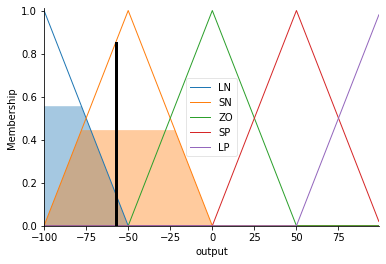

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

angle   = ctrl.Antecedent(np.arange(-180, 181, 1), 'angle')
dev     = ctrl.Antecedent(np.arange(-180, 181, 1), 'dev')
output  = ctrl.Consequent(np.arange(-100, 100, 1), 'output')

# Create membership function

angle['LN'] = fuzz.trimf(angle.universe, [-90, -90, -45])
angle['SN'] = fuzz.trimf(angle.universe, [-90, -45, 0])
angle['ZO'] = fuzz.trimf(angle.universe, [-45, 0, 45])
angle['SP'] = fuzz.trimf(angle.universe, [0, 45, 90])
angle['LP'] = fuzz.trimf(angle.universe, [45, 90, 90])

dev['LN'] = fuzz.trimf(dev.universe, [-90, -90, -45])
dev['SN'] = fuzz.trimf(dev.universe, [-90, -45, 0])
dev['ZO'] = fuzz.trimf(dev.universe, [-45, 0, 45])
dev['SP'] = fuzz.trimf(dev.universe, [0, 45, 90])
dev['LP'] = fuzz.trimf(dev.universe, [45, 90, 90])

output['LN'] = fuzz.trimf(output.universe, [-100, -100, -50])
output['SN'] = fuzz.trimf(output.universe, [-100, -50, 0])
output['ZO'] = fuzz.trimf(output.universe, [-50, 0, 50])
output['SP'] = fuzz.trimf(output.universe, [0, 50, 100])
output['LP'] = fuzz.trimf(output.universe, [50, 100, 100])

# Rule creation

r1 = ctrl.Rule((angle['LN'] & dev['LN'])|
               (angle['SN'] & dev['LN'])|
               (angle['ZO'] & dev['LN'])|
               (angle['LN'] & dev['SN'])|
               (angle['LN'] & dev['ZO']), output['LP'])

r2 = ctrl.Rule((angle['SN'] & dev['SN'])|
               (angle['LN'] & dev['SP'])|
               (angle['SN'] & dev['ZO'])|
               (angle['ZO'] & dev['SN'])|
               (angle['SP'] & dev['LN']), output['SP'])

r3 = ctrl.Rule((angle['LP'] & dev['LN'])|
               (angle['SP'] & dev['SN'])|
               (angle['ZO'] & dev['ZO'])|
               (angle['SN'] & dev['SP'])|
               (angle['LN'] & dev['LP']), output['ZO'])

r4 = ctrl.Rule((angle['SP'] & dev['SP'])|
               (angle['LP'] & dev['SN'])|
               (angle['ZO'] & dev['SP'])|
               (angle['SP'] & dev['ZO'])|
               (angle['SN'] & dev['LP']), output['SN'])

r5 = ctrl.Rule((angle['LP'] & dev['LP'])|
               (angle['SP'] & dev['LP'])|
               (angle['ZO'] & dev['LP'])|
               (angle['LP'] & dev['SP'])|
               (angle['LP'] & dev['ZO']), output['LN'])

motor_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5])
motor_sim  = ctrl.ControlSystemSimulation(motor_ctrl)

motor_sim.input['angle'] = 70
motor_sim.input['dev']   = 30
motor_sim.compute()
print(motor_sim.output['output'])
output.view(sim=motor_sim)

**Three Sensor Mobile Robot**

c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


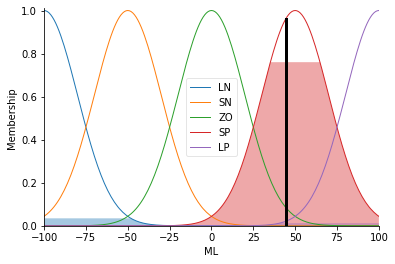

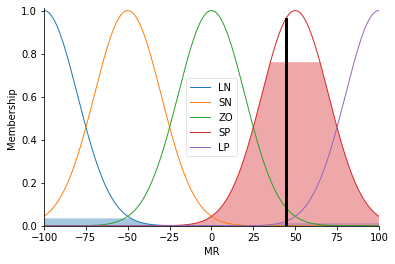

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

sensor_range = np.arange(0.2, 2.0, 0.01)
motor_range  = np.arange(-100, 101, 1)

SL = ctrl.Antecedent(sensor_range, 'SL')
SR = ctrl.Antecedent(sensor_range, 'SR')
SC = ctrl.Antecedent(sensor_range, 'SC')

ML = ctrl.Consequent(motor_range, 'ML')
MR = ctrl.Consequent(motor_range, 'MR')

# Create membership function

SL['N'] = fuzz.gaussmf(SL.universe, 0.2, 0.27)
SL['M'] = fuzz.gaussmf(SL.universe, 1.1, 0.27)
SL['F'] = fuzz.gaussmf(SL.universe, 2.0, 0.27)

SR['N'] = fuzz.gaussmf(SL.universe, 0.2, 0.27)
SR['M'] = fuzz.gaussmf(SL.universe, 1.1, 0.27)
SR['F'] = fuzz.gaussmf(SL.universe, 2.0, 0.27)

SC['N'] = fuzz.gaussmf(SL.universe, 0.2, 0.27)
SC['M'] = fuzz.gaussmf(SL.universe, 1.1, 0.27)
SC['F'] = fuzz.gaussmf(SL.universe, 2.0, 0.27)

ML['LN'] = fuzz.gaussmf(ML.universe, -100, 20)
ML['SN'] = fuzz.gaussmf(ML.universe, -50, 20)
ML['ZO'] = fuzz.gaussmf(ML.universe, 0, 20)
ML['SP'] = fuzz.gaussmf(ML.universe, 50, 20)
ML['LP'] = fuzz.gaussmf(ML.universe, 100, 20)

MR['LN'] = fuzz.gaussmf(MR.universe, -100, 20)
MR['SN'] = fuzz.gaussmf(MR.universe, -50, 20)
MR['ZO'] = fuzz.gaussmf(MR.universe, 0, 20)
MR['SP'] = fuzz.gaussmf(MR.universe, 50, 20)
MR['LP'] = fuzz.gaussmf(MR.universe, 100, 20)

# Rule creation.

r1 = ctrl.Rule((SC['N'] & SL['N'] & SR['N'])|
               (SC['N'] & SL['N'] & SR['M'])|
               (SC['N'] & SL['M'] & SR['N'])|
               (SC['N'] & SL['M'] & SR['M'])|
               (SC['M'] & SL['N'] & SR['N'])|
               (SC['M'] & SL['N'] & SR['M'])|
               (SC['M'] & SL['M'] & SR['N'])|
               (SC['M'] & SL['M'] & SR['M']), ML['LN'])

r2 = ctrl.Rule((SC['N'] & SL['F'] & SR['N'])|
               (SC['N'] & SL['F'] & SR['M'])|
               (SC['M'] & SL['F'] & SR['N'])|
               (SC['M'] & SL['F'] & SR['M'])|
               (SC['F'] & SL['F'] & SR['N']), ML['SN'])

r3 = ctrl.Rule((SC['N'] & SL['N'] & SR['F'])|
               (SC['N'] & SL['M'] & SR['F'])|
               (SC['M'] & SL['N'] & SR['F'])|
               (SC['M'] & SL['M'] & SR['F'])|
               (SC['N'] & SL['F'] & SR['F']), ML['LP'])

r4 = ctrl.Rule((SC['M'] & SL['F'] & SR['F'])|
               (SC['F'] & SL['N'] & SR['N'])|
               (SC['F'] & SL['N'] & SR['M'])|
               (SC['F'] & SL['M'] & SR['N']), ML['SP'])

r5 = ctrl.Rule((SC['F'] & SL['M'] & SR['M'])|
               (SC['F'] & SL['F'] & SR['F']), ML['LP'])

r6 = ctrl.Rule((SC['F'] & SL['N'] & SR['F'])|
               (SC['F'] & SL['M'] & SR['F']), ML['SP'])

r7 = ctrl.Rule((SC['F'] & SL['F'] & SR['M']), ML['ZO'])

r8 = ctrl.Rule((SC['N'] & SL['N'] & SR['N'])|
               (SC['N'] & SL['N'] & SR['M'])|
               (SC['N'] & SL['M'] & SR['N'])|
               (SC['N'] & SL['M'] & SR['M'])|
               (SC['M'] & SL['N'] & SR['N'])|
               (SC['M'] & SL['N'] & SR['M'])|
               (SC['M'] & SL['M'] & SR['N'])|
               (SC['M'] & SL['M'] & SR['M']), MR['LN'])

r9 = ctrl.Rule((SC['N'] & SL['F'] & SR['N'])|
               (SC['N'] & SL['F'] & SR['M'])|
               (SC['M'] & SL['F'] & SR['N'])|
               (SC['M'] & SL['F'] & SR['M'])|
               (SC['F'] & SL['F'] & SR['N']), MR['LP'])

r10 = ctrl.Rule((SC['N'] & SL['N'] & SR['F'])|
               (SC['N'] & SL['M'] & SR['F'])|
               (SC['M'] & SL['N'] & SR['F'])|
               (SC['M'] & SL['M'] & SR['F'])|
               (SC['N'] & SL['F'] & SR['F']), MR['SN'])

r11 = ctrl.Rule((SC['M'] & SL['F'] & SR['F'])|
               (SC['F'] & SL['N'] & SR['N'])|
               (SC['F'] & SL['N'] & SR['M'])|
               (SC['F'] & SL['M'] & SR['N']),  MR['SP'])

r12 = ctrl.Rule((SC['F'] & SL['M'] & SR['M'])|
               (SC['F'] & SL['F'] & SR['F']), MR['LP'])

r13 = ctrl.Rule((SC['F'] & SL['N'] & SR['F'])|
               (SC['F'] & SL['M'] & SR['F']), MR['ZO'])

r14 = ctrl.Rule((SC['F'] & SL['F'] & SR['M']),  MR['SP'])

motor_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14])
motor_sim  = ctrl.ControlSystemSimulation(motor_ctrl)
motor_sim.input['SL'] = 0.3
motor_sim.input['SR'] = 0.3
motor_sim.input['SC'] = 1.8
motor_sim.compute()
ML.view(sim=motor_sim)
MR.view(sim=motor_sim)

**Single tank level control**

0.6125847282128317


c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


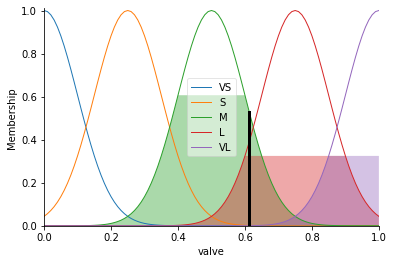

In [7]:
# Fuzzy flow control

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

error = ctrl.Antecedent(np.arange(-1, 1.01, 0.01), 'error')
dev    = ctrl.Antecedent(np.arange(-1, 1.01, 0.01), 'dev')
valve = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'valve')

# Create membership function

error['LN'] = fuzz.gaussmf(error.universe, -1.0, 0.2)
error['SN'] = fuzz.gaussmf(error.universe, -0.5, 0.2)
error['ZO'] = fuzz.gaussmf(error.universe, 0, 0.2)
error['SP'] = fuzz.gaussmf(error.universe, 0.5, 0.2)
error['LP'] = fuzz.gaussmf(error.universe, 1.0, 0.2)

dev['LN'] = fuzz.gaussmf(dev.universe, -1.0, 0.2)
dev['SN'] = fuzz.gaussmf(dev.universe, -0.5, 0.2)
dev['ZO'] = fuzz.gaussmf(dev.universe, 0, 0.2)
dev['SP'] = fuzz.gaussmf(dev.universe, 0.5, 0.2)
dev['LP'] = fuzz.gaussmf(dev.universe, 1.0, 0.2)

valve['VS'] = fuzz.gaussmf(valve.universe, 0, 0.1)
valve['S'] = fuzz.gaussmf(valve.universe, 0.25, 0.1)
valve['M'] = fuzz.gaussmf(valve.universe, 0.5, 0.1)
valve['L'] = fuzz.gaussmf(valve.universe, 0.75, 0.1)
valve['VL'] = fuzz.gaussmf(valve.universe, 1, 0.1)

# Rule creation
r1 = ctrl.Rule((error['LN'] & dev['LN'])|
               (error['SN'] & dev['LN'])|
               (error['ZO'] & dev['LN'])|
               (error['LN'] & dev['SN'])|
               (error['LN'] & dev['ZO']), valve['VS'])

r2 = ctrl.Rule((error['SN'] & dev['SN'])|
               (error['LN'] & dev['SP'])|
               (error['SN'] & dev['ZO'])|
               (error['ZO'] & dev['SN'])|
               (error['SP'] & dev['LN']), valve['S'])

r3 = ctrl.Rule((error['LP'] & dev['LN'])|
               (error['SP'] & dev['SN'])|
               (error['ZO'] & dev['ZO'])|
               (error['SN'] & dev['SP'])|
               (error['LN'] & dev['LP']), valve['M'])

r4 = ctrl.Rule((error['SP'] & dev['SP'])|
               (error['LP'] & dev['SN'])|
               (error['ZO'] & dev['SP'])|
               (error['SP'] & dev['ZO'])|
               (error['SN'] & dev['LP']), valve['L'])

r5 = ctrl.Rule((error['LP'] & dev['LP'])|
               (error['SP'] & dev['LP'])|
               (error['ZO'] & dev['LP'])|
               (error['LP'] & dev['SP'])|
               (error['LP'] & dev['ZO']), valve['VL'])

valve_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5])
valve_sim  = ctrl.ControlSystemSimulation(valve_ctrl)

valve_sim.input['error'] = 0.7
valve_sim.input['dev']   = -0.3
valve_sim.compute()
print(valve_sim.output['valve'])
valve.view(sim=valve_sim)

**Navigation for humanoid robot**

c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


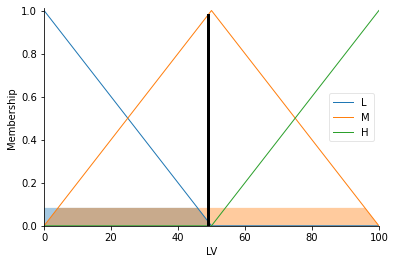

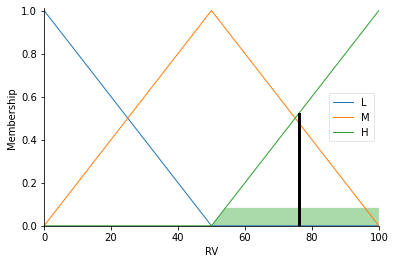

In [29]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

range = np.arange(0, 6.1, 0.1)

SR = ctrl.Antecedent(range, 'SR')
SL = ctrl.Antecedent(range, 'SL')
SF = ctrl.Antecedent(range, 'SF')
BA = ctrl.Antecedent(np.arange(-180, 181, 1), 'BA')

LV = ctrl.Consequent(np.arange(0, 101, 1), 'LV')
RV = ctrl.Consequent(np.arange(0, 101, 1), 'RV')

# Create membership function

SR['VN'] = fuzz.trapmf(SR.universe, [0, 0, 1.2, 2.4])
SR['QN'] = fuzz.trimf(SR.universe, [1.2, 2.4, 3.6])
SR['QF'] = fuzz.trimf(SR.universe, [2.4, 3.6, 4.8])
SR['VF'] = fuzz.trapmf(SR.universe, [3.6, 4.8, 6, 6])

SL['VN'] = fuzz.trapmf(SL.universe, [0, 0, 1.2, 2.4])
SL['QN'] = fuzz.trimf(SL.universe, [1.2, 2.4, 3.6])
SL['QF'] = fuzz.trimf(SL.universe, [2.4, 3.6, 4.8])
SL['VF'] = fuzz.trapmf(SL.universe, [3.6, 4.8, 6, 6])

SF['VN'] = fuzz.trapmf(SF.universe, [0, 0, 1.2, 2.4])
SF['QN'] = fuzz.trimf(SF.universe, [1.2, 2.4, 3.6])
SF['QF'] = fuzz.trimf(SF.universe, [2.4, 3.6, 4.8])
SF['VF'] = fuzz.trapmf(SF.universe, [3.6, 4.8, 6, 6])

BA['VN'] = fuzz.trapmf(BA.universe, [-180, -180, -60, -20])
BA['QN'] = fuzz.trimf(BA.universe, [-60, -20, 20])
BA['QP'] = fuzz.trimf(BA.universe, [-20, 20, 60])
BA['VP'] = fuzz.trapmf(BA.universe, [20, 60, 180, 180])

LV['L'] = fuzz.trimf(LV.universe, [0, 0, 50])
LV['M'] = fuzz.trimf(LV.universe, [0, 50, 100])
LV['H'] = fuzz.trimf(LV.universe, [50, 100, 100])

RV['L'] = fuzz.trimf(RV.universe, [0, 0, 50])
RV['M'] = fuzz.trimf(RV.universe, [0, 50, 100])
RV['H'] = fuzz.trimf(RV.universe, [50, 100, 100])

# Rule creation

rule_list = []

# Avoidance rule

rule_list.append(ctrl.Rule((SL['VN'] | SL['QN'] | SL['QF'] | SL['VF']) & SR['VN'] & (SF['VN'] | SF['QN']), (LV['L'], RV['H'])))
rule_list.append(ctrl.Rule(SL['VN'] & (SR['QN'] | SR['QF'] | SR['VF']) & (SF['VN'] | SF['QN']),            (LV['H'], RV['L'])))
rule_list.append(ctrl.Rule(SL['QN'] & SR['QN'] & (SF['QF'] | SF['VF']),                                    (LV['M'], RV['M'])))
rule_list.append(ctrl.Rule((SL['QF'] | SL['VF']) & SR['QN'] & (SF['QN'] | SF['VN']),                       (LV['M'], RV['H'])))
rule_list.append(ctrl.Rule(SL['QN'] & (SR['QF'] | SR['VF']) & (SF['QN'] | SF['VN']),                       (LV['H'], RV['M'])))
rule_list.append(ctrl.Rule(SL['VN'] & SR['VN'] & (SF['QF'] | SF['VF']),                                    (LV['L'], RV['L'])))

# Navigation rule

nav_cond = (SL['QF'] | SL['VF']) & (SR['QF'] | SR['VF']) & (SF['QF'] | SF['VF'])

rule_list.append(ctrl.Rule(nav_cond & BA['VP'], (LV['L'], RV['H'])))
rule_list.append(ctrl.Rule(nav_cond & BA['QP'], (LV['M'], RV['H'])))
rule_list.append(ctrl.Rule(nav_cond & BA['QN'], (LV['H'], RV['M'])))
rule_list.append(ctrl.Rule(nav_cond & BA['VN'], (LV['H'], RV['L'])))

mobile_ctrl = ctrl.ControlSystem(rule_list)
mobile_sim  = ctrl.ControlSystemSimulation(mobile_ctrl)

mobile_sim.input['SL'] = 5
mobile_sim.input['SR'] = 2.5
mobile_sim.input['SF'] = 5
mobile_sim.input['BA'] = 30

mobile_sim.compute()

LV.view(sim=mobile_sim)
RV.view(sim=mobile_sim)

**Navigation of several mobile robots**

c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


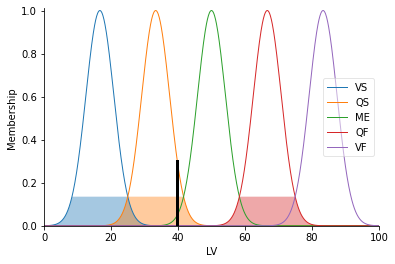

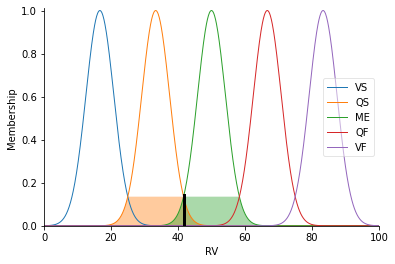

In [36]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

range = np.arange(0, 6.01, 0.01)

SR = ctrl.Antecedent(range, 'SR')
SL = ctrl.Antecedent(range, 'SL')
SF = ctrl.Antecedent(range, 'SF')
HA = ctrl.Antecedent(np.arange(-180, 181, 1), 'HA')

LV = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'LV')
RV = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'RV')

# Create membership function

center_list = [1.0, 2.0, 3.0, 4.0, 5.0]
dist_list   = ['VN', 'QN', 'ME', 'QF', 'VF']
num = np.arange(0,5,1)
for i in num:
    SL[dist_list[i]] = fuzz.gaussmf(range, center_list[i], 0.25)
    SR[dist_list[i]] = fuzz.gaussmf(range, center_list[i], 0.25)
    SF[dist_list[i]] = fuzz.gaussmf(range, center_list[i], 0.25)

HA['VN'] = fuzz.gaussmf(HA.universe, -120, 15)
HA['QN'] = fuzz.gaussmf(HA.universe,  -60, 15)
HA['MD'] = fuzz.gaussmf(HA.universe,    0, 15)
HA['QP'] = fuzz.gaussmf(HA.universe,   60, 15)
HA['VP'] = fuzz.gaussmf(HA.universe,  120, 15)

LV['VS'] = fuzz.gaussmf(LV.universe, 100/6, 25/6)
LV['QS'] = fuzz.gaussmf(LV.universe, 200/6, 25/6)
LV['ME'] = fuzz.gaussmf(LV.universe, 300/6, 25/6)
LV['QF'] = fuzz.gaussmf(LV.universe, 400/6, 25/6)
LV['VF'] = fuzz.gaussmf(LV.universe, 500/6, 25/6)

RV['VS'] = fuzz.gaussmf(RV.universe, 100/6, 25/6)
RV['QS'] = fuzz.gaussmf(RV.universe, 200/6, 25/6)
RV['ME'] = fuzz.gaussmf(RV.universe, 300/6, 25/6)
RV['QF'] = fuzz.gaussmf(RV.universe, 400/6, 25/6)
RV['VF'] = fuzz.gaussmf(RV.universe, 500/6, 25/6)

# Rule creation

rule_list = []

# Avoidance rule

rule_list.append(ctrl.Rule((SL['VN'] | SL['QN'] | SL['ME'] | SL['QF'] | SL['VF']) & (SR['VN'] | SR['QN']) & (SR['VN'] | SR['QN']), (LV['VS'], RV['ME'])))
rule_list.append(ctrl.Rule((SL['VN'] | SL['QN']) & (SR['QN'] | SR['ME'] | SR['QF'] | SR['VF']) & SF['VN'], (LV['ME'], RV['VS'])))
rule_list.append(ctrl.Rule((SL['VN'] | SL['QN']) & (SR['VN'] | SR['QN']) & (SF['ME'] | SF['QF'] | SF['VF']), ((LV['QS'], RV['QS']))))
rule_list.append(ctrl.Rule((SL['VN'] | SL['QN']) & (SR['ME'] | SR['QF'] | SR['VF']) & (SF['ME'] | SF['QF'] | SF['VF']), (LV['QF'], RV['QS'])))
rule_list.append(ctrl.Rule((SL['ME'] | SL['QF'] | SL['VF']) & (SR['VN'] | SR['QN']) & (SF['ME'] | SF['QF'] | SF['VF']), (LV['QF'], RV['QS'])))
rule_list.append(ctrl.Rule((SL['ME'] | SL['QF'] | SL['VF']) & (SR['ME'] | SR['QF'] | SR['VF']) & (SF['VN'] | SF['QN']), (LV['QS'], RV['QF'])))

# Navigation rule

nav_cond = ((SL['ME'] | SL['QF'] | SL['VF']) & (SR['ME'] | SR['QF'] | SR['VF']) & (SF['ME'] | SF['QF'] | SF['VF']))

rule_list.append(ctrl.Rule(nav_cond & HA['VN'], (LV['VF'], RV['QS'])))
rule_list.append(ctrl.Rule(nav_cond & HA['QN'], (LV['QF'], RV['QS'])))
rule_list.append(ctrl.Rule(nav_cond & HA['MD'], (LV['VF'], RV['VF'])))
rule_list.append(ctrl.Rule(nav_cond & HA['QP'], (LV['QS'], RV['QF'])))
rule_list.append(ctrl.Rule(nav_cond & HA['VP'], (LV['QS'], RV['VF'])))

mobile_ctrl = ctrl.ControlSystem(rule_list)
mobile_sim  = ctrl.ControlSystemSimulation(mobile_ctrl)

mobile_sim.input['SL'] = 2
mobile_sim.input['SR'] = 2.5
mobile_sim.input['SF'] = 3
mobile_sim.input['HA'] = 30

mobile_sim.compute()

LV.view(sim=mobile_sim)
RV.view(sim=mobile_sim)

**Navigation mobile robot**

c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


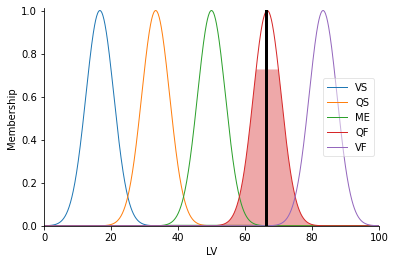

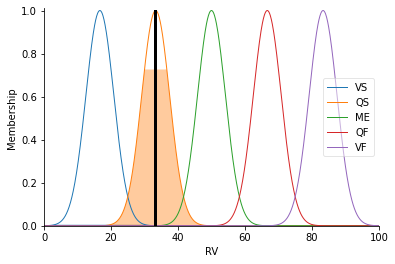

In [20]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

dist  = ctrl.Antecedent(np.arange(0, 10.01, 0.01), 'dist')
angle = ctrl.Antecedent(np.arange(-180, 180, 0.1), 'angle')

LV = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'LV')
RV = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'RV')

# Create membership function

dist['VN'] = fuzz.gaussmf(dist.universe, 10/6, 2.5/6)
dist['QN'] = fuzz.gaussmf(dist.universe, 20/6, 2.5/6)
dist['ME'] = fuzz.gaussmf(dist.universe, 30/6, 2.5/6)
dist['QF'] = fuzz.gaussmf(dist.universe, 40/6, 2.5/6)
dist['VF'] = fuzz.gaussmf(dist.universe, 50/6, 2.5/6)

angle['VN'] = fuzz.gaussmf(angle.universe, -120, 15)
angle['QN'] = fuzz.gaussmf(angle.universe,  -60, 15)
angle['MD'] = fuzz.gaussmf(angle.universe,    0, 15)
angle['QP'] = fuzz.gaussmf(angle.universe,   60, 15)
angle['VP'] = fuzz.gaussmf(angle.universe,  120, 15)

LV['VS'] = fuzz.gaussmf(LV.universe, 100/6, 25/6)
LV['QS'] = fuzz.gaussmf(LV.universe, 200/6, 25/6)
LV['ME'] = fuzz.gaussmf(LV.universe, 300/6, 25/6)
LV['QF'] = fuzz.gaussmf(LV.universe, 400/6, 25/6)
LV['VF'] = fuzz.gaussmf(LV.universe, 500/6, 25/6)

RV['VS'] = fuzz.gaussmf(RV.universe, 100/6, 25/6)
RV['QS'] = fuzz.gaussmf(RV.universe, 200/6, 25/6)
RV['ME'] = fuzz.gaussmf(RV.universe, 300/6, 25/6)
RV['QF'] = fuzz.gaussmf(RV.universe, 400/6, 25/6)
RV['VF'] = fuzz.gaussmf(RV.universe, 500/6, 25/6)

# Rule creation

rule_list = []

rule_list.append(ctrl.Rule(dist['VN'] & angle['VN'], (LV['ME'], RV['VS'])))
rule_list.append(ctrl.Rule(dist['VN'] & angle['QN'], (LV['QS'], RV['VS'])))
rule_list.append(ctrl.Rule(dist['VN'] & angle['MD'], (LV['VS'], RV['VS'])))
rule_list.append(ctrl.Rule(dist['VN'] & angle['QP'], (LV['VS'], RV['QS'])))
rule_list.append(ctrl.Rule(dist['VN'] & angle['VP'], (LV['VS'], RV['ME'])))

rule_list.append(ctrl.Rule(dist['QN'] & angle['VN'], (LV['QF'], RV['QS'])))
rule_list.append(ctrl.Rule(dist['QN'] & angle['QN'], (LV['ME'], RV['QS'])))
rule_list.append(ctrl.Rule(dist['QN'] & angle['MD'], (LV['QS'], RV['QS'])))
rule_list.append(ctrl.Rule(dist['QN'] & angle['QP'], (LV['QS'], RV['ME'])))
rule_list.append(ctrl.Rule(dist['QN'] & angle['VP'], (LV['QS'], RV['QF'])))

rule_list.append(ctrl.Rule(dist['ME'] & angle['VN'], (LV['QF'], RV['QS'])))
rule_list.append(ctrl.Rule(dist['ME'] & angle['QN'], (LV['ME'], RV['QS'])))
rule_list.append(ctrl.Rule(dist['ME'] & angle['MD'], (LV['ME'], RV['ME'])))
rule_list.append(ctrl.Rule(dist['ME'] & angle['QP'], (LV['QS'], RV['ME'])))
rule_list.append(ctrl.Rule(dist['ME'] & angle['VP'], (LV['QS'], RV['QF'])))

rule_list.append(ctrl.Rule(dist['QF'] & angle['VN'], (LV['VF'], RV['ME'])))
rule_list.append(ctrl.Rule(dist['QF'] & angle['QN'], (LV['QF'], RV['ME'])))
rule_list.append(ctrl.Rule(dist['QF'] & angle['MD'], (LV['QF'], RV['QF'])))
rule_list.append(ctrl.Rule(dist['QF'] & angle['QP'], (LV['ME'], RV['QF'])))
rule_list.append(ctrl.Rule(dist['QF'] & angle['VP'], (LV['ME'], RV['VF'])))

rule_list.append(ctrl.Rule(dist['VF'] & angle['VN'], (LV['VF'], RV['ME'])))
rule_list.append(ctrl.Rule(dist['VF'] & angle['QN'], (LV['QF'], RV['ME'])))
rule_list.append(ctrl.Rule(dist['VF'] & angle['MD'], (LV['VF'], RV['VF'])))
rule_list.append(ctrl.Rule(dist['VF'] & angle['QP'], (LV['ME'], RV['QF'])))
rule_list.append(ctrl.Rule(dist['VF'] & angle['VP'], (LV['ME'], RV['VF'])))

mobile_ctrl = ctrl.ControlSystem(rule_list)
mobile_sim  = ctrl.ControlSystemSimulation(mobile_ctrl)

mobile_sim.input['dist'] = 3
mobile_sim.input['angle'] = -130

mobile_sim.compute()

LV.view(sim=mobile_sim)
RV.view(sim=mobile_sim)